In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo.lofo_importance import LOFOImportance, plot_importance
from lofo.flofo_importance import FLOFOImportance

In [2]:
from data.test_data import generate_test_data, generate_unstructured_test_data

df = generate_test_data(1000)
df.head()

,A,B,C,D,target,binary_target
0,0.548814,0.592880,0.811518,0.413962,1.471477,1
1,0.715189,0.010064,0.476084,0.629618,0.583727,0
2,0.602763,0.475826,0.523156,0.778584,1.448437,1
3,0.544883,0.708770,0.250521,0.851558,1.951483,1
4,0.423655,0.043975,0.605043,0.816413,0.444471,0


In [3]:
lr = LinearRegression()
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
cv = KFold(n_splits=4, shuffle=True, random_state=0)

In [4]:
from sklearn.metrics import make_scorer, mean_absolute_error
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [5]:
lr.fit(df[["A", "B", "C", "D"]], df["target"])
fi = FLOFOImportance(lr.predict, df, ["A", "B", "C", "D"], 'target', scoring=scorer)

importances = fi.get_importance()
importances

/home/ahmet/kaggle/lofo-importance/lofo/flofo_importance.py:27: UserWarning: Small validation set
  warnings.warn("Small validation set")


,feature,importance_mean,importance_std
1,B,0.551571,0.014526
3,D,0.090718,0.003025
0,A,0.088935,0.002540
2,C,0.000151,0.000068


In [6]:
fi = LOFOImportance(df, ["A", "B", "C", "D"], 'target', scoring=scorer,
                    model=lr, cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.445256,0.026244
3,D,0.053289,0.006535
0,A,0.050934,0.004749
2,C,0.000049,0.000028


In [7]:
fi = LOFOImportance(df, ["A", "B", "C", "D"], 'binary_target', scoring='accuracy',
                    model=rf, cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.421,0.015588
0,A,0.043,0.019875
3,D,0.038,0.007211
2,C,0.006,0.009165


In [8]:
df = generate_unstructured_test_data(10000)

fi = LOFOImportance(df, ["A", "B", "C", "D"], 'binary_target', 'roc_auc')

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
1,B,0.190080,0.004669
0,A,0.004766,0.004523
3,D,0.003300,0.001643
2,C,0.000616,0.006351


In [9]:
fi = LOFOImportance(df, ["A", "B", "C", "D", "E"], 'target', scorer, n_jobs=-1)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std
4,E,0.543890,0.002727
1,B,0.298485,0.006152
3,D,0.047357,0.001626
0,A,0.038360,0.000741
2,C,-0.000361,0.000450


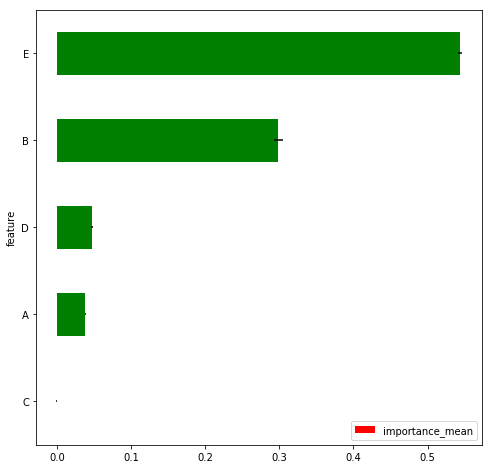

In [10]:
%matplotlib inline
plot_importance(importances)